## Plot Solutions to Time-dependent Schrodinger Equation

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.special import hermite

In [2]:
def read_wavefunction_file(filename):
    with open(filename) as f:
        data = f.readlines()

    # get the x and t grids
    x_grid = np.array(data[0].split()[3:], dtype=float)
    t_grid = np.array(data[1].split()[3:], dtype=float)
    
    # get wavefunction
    wavefunction = np.zeros((len(x_grid), len(t_grid)), dtype=complex)

    for i in range(len(t_grid)):
        z_str = [x.strip(')').strip('(').split(',') for x in data[i + 2].split()]
        wavefunction[:, i] = np.array([complex(float(a[0]), float(a[1])) for a in z_str], dtype=complex)

    return x_grid, t_grid, wavefunction

In [3]:
def get_norm(complex_array, dx):
    return np.sqrt(np.real(sum(np.conj(complex_array) * complex_array * dx)))

In [4]:
plot_dir = f"..{os.sep}plots"

## Load data

In [5]:
filename = "../solution.txt"

In [6]:
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

In [7]:
dx = x_grid[1] - x_grid[0]
dx

0.010010010010010006

## Plot Wavefunction

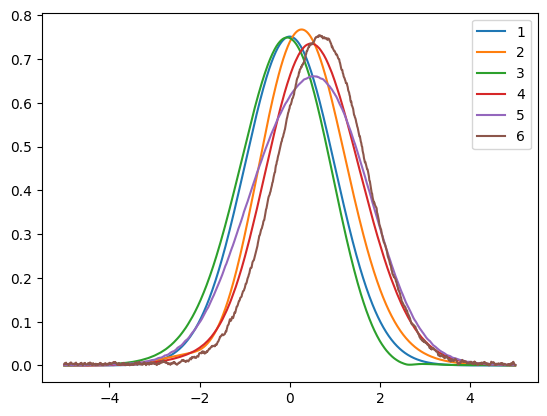

In [8]:
plt.plot(x_grid, np.absolute(wavefunction[:, 0]), label="1")
plt.plot(x_grid, np.absolute(wavefunction[:, 250]), label="2")
plt.plot(x_grid, np.absolute(wavefunction[:, 500]), label="3")
plt.plot(x_grid, np.absolute(wavefunction[:, 1000]), label="4")
plt.plot(x_grid, np.absolute(wavefunction[:, 2000]), label="5")
plt.plot(x_grid, np.absolute(wavefunction[:, 4000]), label="6")
plt.legend();